In [3]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'

som_model = get_yolo_model(model_path='weights/icon_detect/best.pt').to(device)
som_model.to(device)
print('model to {}'.format(device))

model to cuda


/home/aryankargwal/miniconda3/envs/myenv/lib/python3.12/site-packages/ultralytics/nn/tasks.py:714: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_

In [4]:
# two choices for caption model: fine-tuned blip2 or florence2

caption_model_processor = get_caption_model_processor(model_name="blip2", model_name_or_path="weights/icon_caption_blip2", device=device)
#caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



/home/aryankargwal/miniconda3/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


In [5]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [6]:

cnt = 0
image_path = 'imgs/google_page.png'
# image_path = 'imgs/windows_home.png'
image_path = 'imgs/windows_multitab.png'
draw_bbox_config = {
    'text_scale': 0.8,
    'text_thickness': 2,
    'text_padding': 3,
    'thickness': 3,
}
BOX_TRESHOLD = 0.03

image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.1)





image 1/1 /home/aryankargwal/Code/genai-tutorials/OmniParser/imgs/windows_multitab.png: 448x640 214 0s, 24.9ms
Speed: 1.5ms preprocess, 24.9ms inference, 58.9ms postprocess per image at shape (1, 3, 448, 640)


Expanding inputs for image tokens in BLIP-2 should be done in processing. Please follow instruction here (https://gist.github.com/zucchini-nlp/e9f20b054fa322f84ac9311d9ab67042) to update your BLIP-2 model. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Expanding inputs for image tokens in BLIP-2 should be done in processing. Please follow instruction here (https://gist.github.com/zucchini-nlp/e9f20b054fa322f84ac9311d9ab67042) to update your BLIP-2 model. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


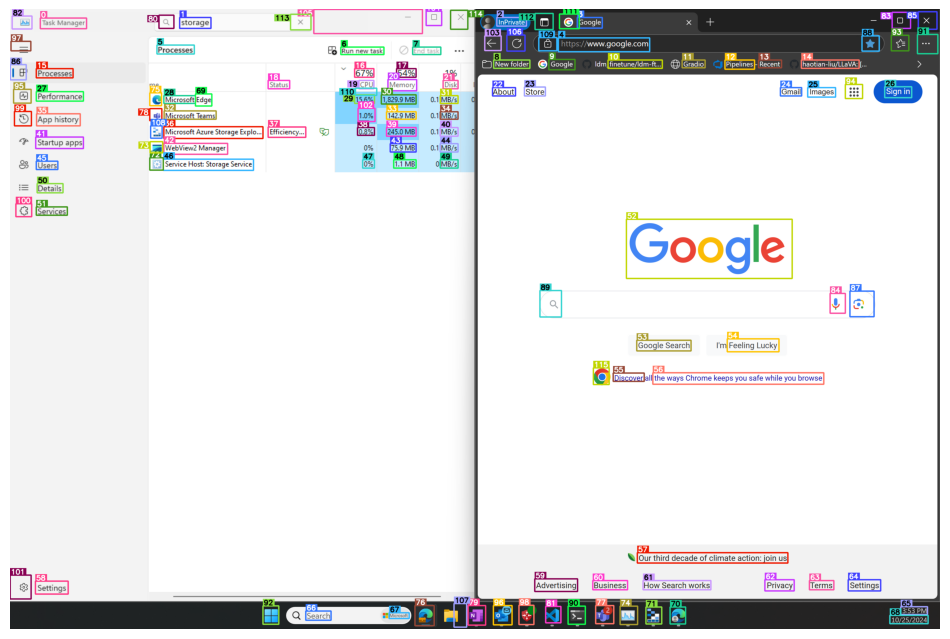

In [7]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)


In [10]:
# print(label_coordinates)
parsed_content_list

['Text Box ID 0: Task Manager',
 'Text Box ID 1: storage',
 'Text Box ID 2: InPrivate',
 'Text Box ID 3: Google',
 'Text Box ID 4: https:/ WWW.googlecom',
 'Text Box ID 5: Processes',
 'Text Box ID 6: Run new task',
 'Text Box ID 7: End task',
 'Text Box ID 8: New folder',
 'Text Box ID 9: Google',
 'Text Box ID 10: finetune/ldm-ft__',
 'Text Box ID 11: Gradio',
 'Text Box ID 12: Pipelines',
 'Text Box ID 13: Recent',
 'Text Box ID 14: haotian-liu/LLaVA:',
 'Text Box ID 15: Processes',
 'Text Box ID 16: 67%',
 'Text Box ID 17: 5496',
 'Text Box ID 18: Status',
 'Text Box ID 19: CPU',
 'Text Box ID 20: Memory',
 'Text Box ID 21: Disk',
 'Text Box ID 22: About',
 'Text Box ID 23: Store',
 'Text Box ID 24: Gmail',
 'Text Box ID 25: Images',
 'Text Box ID 26: Sign in',
 'Text Box ID 27: Performance',
 'Text Box ID 28: Microscft',
 'Text Box ID 29: 15.686',
 'Text Box ID 30: 1,829,9 MB',
 'Text Box ID 31: MBI:',
 'Text Box ID 32: Microscft Tean;',
 'Text Box ID 33: 142.9MB',
 'Text Box ID 3